In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
from matplotlib.dates import DateFormatter

import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import math
import dataframe_image as dfi

In [318]:
tweets_sentiments = pd.read_csv('../data/interim/bitcoin_all_tweets_sentiments_merged_20210101-20210930.csv', index_col = 0)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [319]:
#1107812/1107811
#tweets_sentiments = pd.read_csv('../data/interim/bitcoin_all_tweets_sentiments_20210101-20210930.csv', index_col = 0)
#tweets_sentiments_next = pd.read_csv('../data/interim/bitcoin_all_tweets_sentiments_20210201-20210531.csv', index_col = 0)
#tweets_sentiments_next = tweets_sentiments_next[1107811:]
#tweets_sentiments_full = pd.concat([tweets_sentiments, tweets_sentiments_next])

#filename = '../data/interim/bitcoin_all_tweets_sentiments_merged_20210101-20210930.csv'
#tweets_sentiments_full.to_csv(filename, mode='w')


In [320]:
tweets_sentiments.shape


(17922817, 17)

In [321]:
tweets_sentiments['dateTime']= pd.to_datetime(tweets_sentiments['dateTime'])


In [322]:
tweets_sentiments = tweets_sentiments[['id', 'dateTime', 'prediction']]

tweets_sentiments.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 17922817 entries, 0 to 18227168
Data columns (total 3 columns):
 #   Column      Dtype              
---  ------      -----              
 0   id          int64              
 1   dateTime    datetime64[ns, UTC]
 2   prediction  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 547.0+ MB


In [323]:
thirty_mins_span = tweets_sentiments.groupby('prediction').resample('30min', on='dateTime').count()

fortyfive_mins_span = tweets_sentiments.groupby('prediction').resample('45min', on='dateTime').count()

one_h_span = tweets_sentiments.groupby('prediction').resample('1H', on='dateTime').count()

two_h_span = tweets_sentiments.groupby('prediction').resample('2H', on='dateTime').count()

daily_span = tweets_sentiments.groupby('prediction').resample('D', on='dateTime').count()

fifteen_mins_span = tweets_sentiments.groupby('prediction').resample('15min', on='dateTime').count()

In [324]:
thirty_mins_span = thirty_mins_span.unstack('prediction', fill_value=0)
thirty_mins_span = thirty_mins_span[('id')]

fortyfive_mins_span = fortyfive_mins_span.unstack('prediction', fill_value=0)
fortyfive_mins_span = fortyfive_mins_span[('id')]

one_h_span = one_h_span.unstack('prediction', fill_value=0)
one_h_span = one_h_span[('id')]

two_h_span = two_h_span.unstack('prediction', fill_value=0)
two_h_span = two_h_span[('id')]

daily_span = daily_span.unstack('prediction', fill_value=0)
daily_span = daily_span[('id')]

fifteen_mins_span = fifteen_mins_span.unstack('prediction', fill_value=0)
fifteen_mins_span = fifteen_mins_span[('id')]


In [325]:
two_h_span.index.name = None
two_h_span.columns.name = 'index'

#two_h_span.loc['2021-09-10':'2021-09-30']
daily_span.index.name = None
daily_span.columns.name = 'index'

#daily_span.loc['2021-09-10':'2021-09-30']

one_h_span.index.name = None
one_h_span.columns.name = 'index'

thirty_mins_span.index.name = None
thirty_mins_span.columns.name = 'index'

fortyfive_mins_span.index.name = None
fortyfive_mins_span.columns.name = 'index'

fifteen_mins_span.index.name = None
fifteen_mins_span.columns.name = 'index'



In [326]:
def calc_percentage(df):
    df['total'] = df['negative'] + df['neutral'] + df['positive']
    df['pos_percent'] = df['positive'] / df['total'] * 100 
    df['neu_percent'] = df['neutral'] / df['total'] * 100
    df['neg_percent'] = df['negative'] / df['total'] * 100

calc_percentage(fifteen_mins_span)
calc_percentage(thirty_mins_span)
calc_percentage(fortyfive_mins_span)
calc_percentage(one_h_span)
calc_percentage(two_h_span)
calc_percentage(daily_span)




In [327]:
daily_span

index,negative,neutral,positive,unknown,total,pos_percent,neu_percent,neg_percent
2021-02-01 00:00:00+00:00,7464,35081,16659,0,59204,28.138301,59.254442,12.607256
2021-02-02 00:00:00+00:00,7379,33778,14787,0,55944,26.431789,60.378235,13.189976
2021-02-03 00:00:00+00:00,6822,35941,17182,0,59945,28.662941,59.956627,11.380432
2021-02-04 00:00:00+00:00,7513,36548,17347,0,61408,28.248762,59.516675,12.234562
2021-02-05 00:00:00+00:00,12970,38451,16877,0,68298,24.710826,56.298867,18.990307
...,...,...,...,...,...,...,...,...
2021-09-26 00:00:00+00:00,7892,35599,19496,0,62987,30.952419,56.518012,12.529570
2021-09-27 00:00:00+00:00,8267,39383,21553,0,69203,31.144604,56.909383,11.946014
2021-09-28 00:00:00+00:00,9627,39755,21009,0,70391,29.846145,56.477391,13.676464
2021-09-29 00:00:00+00:00,8977,41062,21834,0,71873,30.378584,57.131329,12.490087


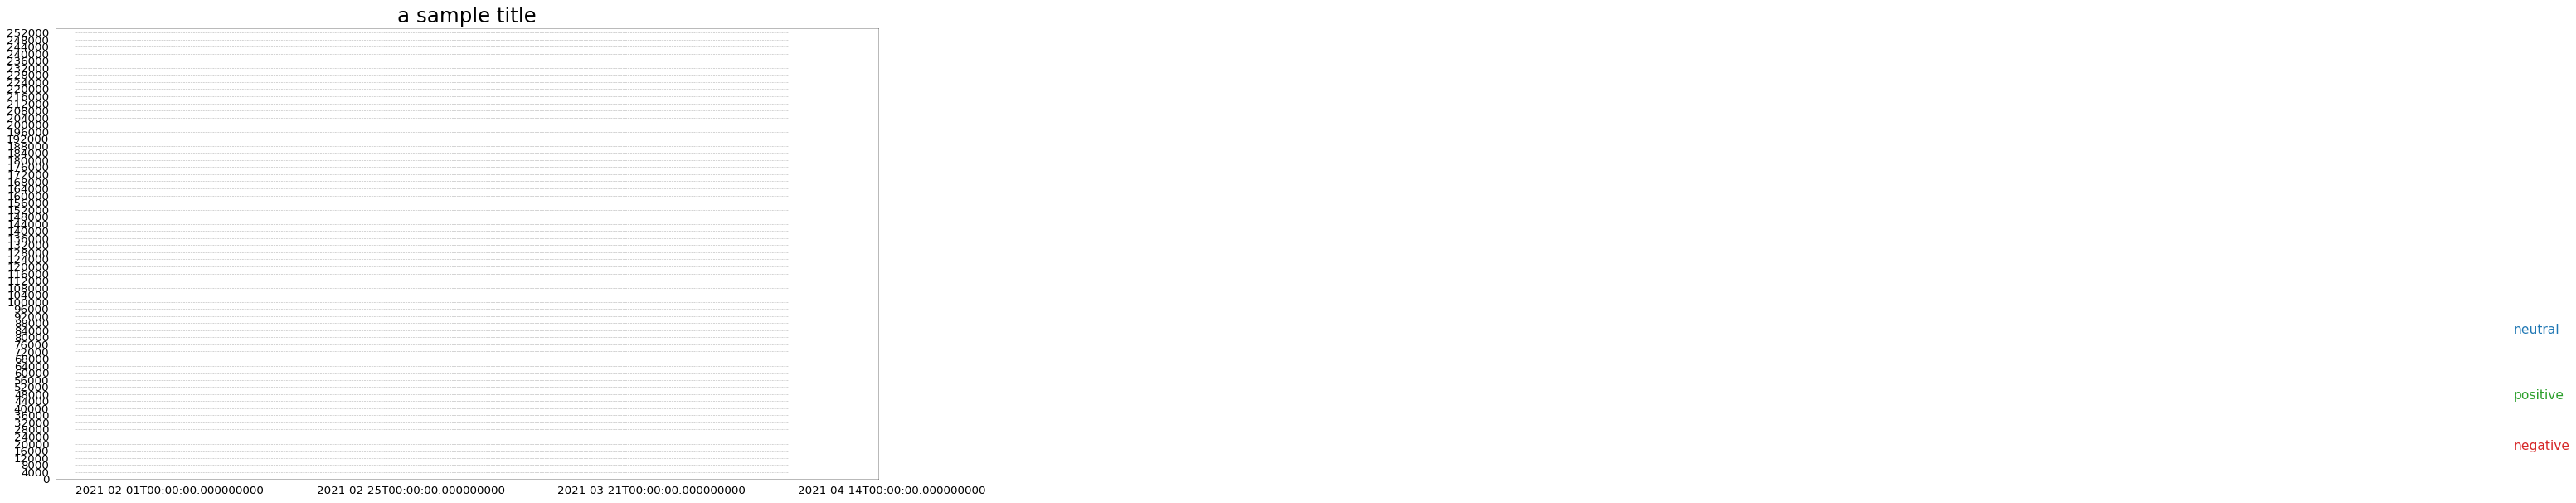

In [328]:
plot = daily_span

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 0
y_UL = int(plot.iloc[:, 1:].max().max()*1.1)
#y_UL = 50000
y_interval = 4000
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = plot.columns[:3]  
for i, column in enumerate(columns):    
    valt = plot[column].values
    plt.plot(plot.index.values, plot[column].values, lw=1.5, color=mycolors[i])    
    plt.text(plot.shape[0]+1, plot[column].values[-1], column, fontsize=14, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('a sample title', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, plot.shape[0], 24), plot.index.values[::24], horizontalalignment='left', fontsize=12)    


plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 80)    
plt.show()

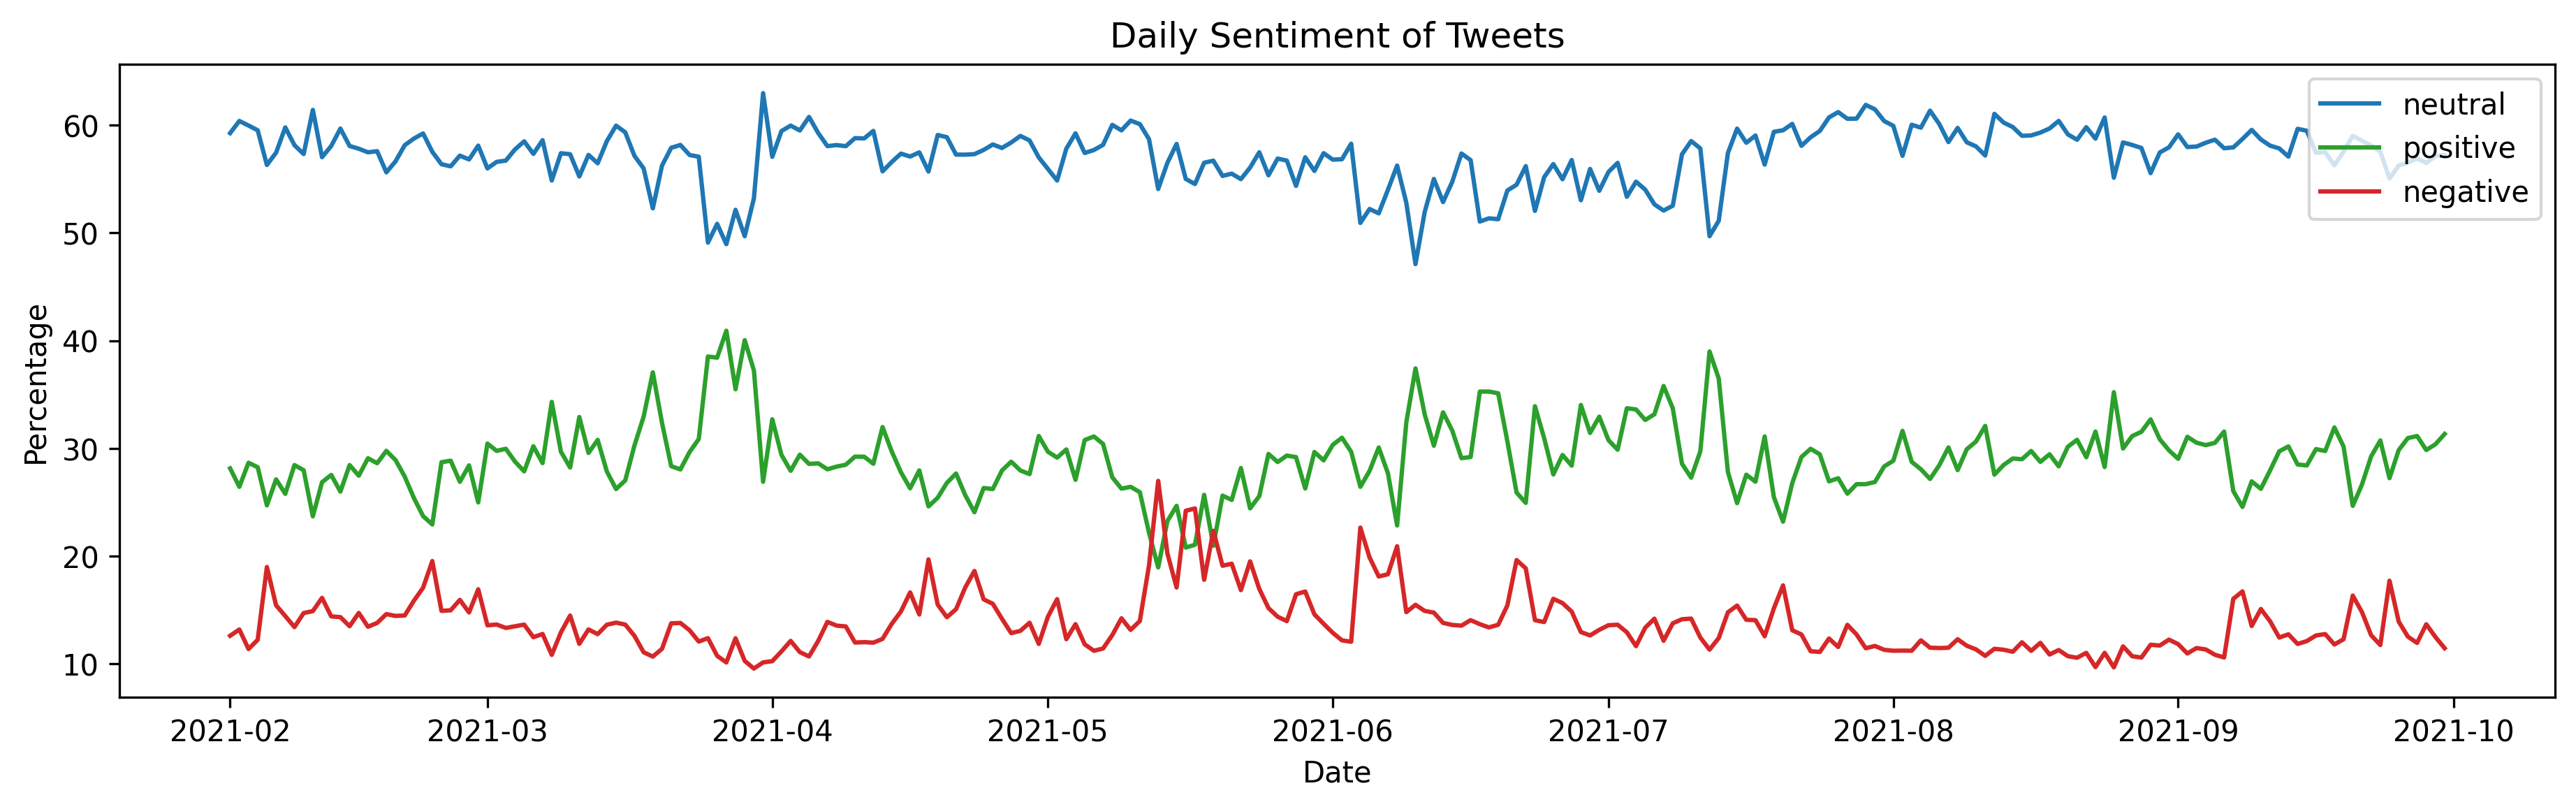

In [329]:
plot = daily_span

x = plot.index.values

pos = plot['pos_percent']
neu = plot['neu_percent']
neg = plot['neg_percent']

mycolors = ['tab:red', 'tab:blue', 'tab:green']    
figure(figsize = (15, 4), dpi = 300)
plt.title('Daily Sentiment of Tweets', loc='center')
plt.plot(x,neu, color=mycolors[1], label="neutral")
plt.plot(x,pos, color=mycolors[2], label="positive")
plt.plot(x,neg, color=mycolors[0], label="negative")
plt.legend(loc="upper right")
plt.xlabel("Date", color='#000000')
plt.ylabel("Percentage", color='#000000')
plt.savefig('DST.png', bbox_inches='tight')

plt.show()

In [15]:
fifteen_mins_span = fifteen_mins_span.reset_index().rename(columns={'index':'datetime'})
thirty_mins_span = thirty_mins_span.reset_index().rename(columns={'index':'datetime'})
fortyfive_mins_span = fortyfive_mins_span.reset_index().rename(columns={'index':'datetime'})
one_h_span = one_h_span.reset_index().rename(columns={'index':'datetime'})
two_h_span = two_h_span.reset_index().rename(columns={'index':'datetime'})
daily_span = daily_span.reset_index().rename(columns={'index':'datetime'})



In [16]:
bitcoin_prices = pd.read_csv('../data/external/Bitstamp_BTCUSD_2021_minute_final.csv', header = 1)


In [17]:
bpd = bitcoin_prices[['date', 'open', 'Volume BTC']]
bpd['date'] = pd.to_datetime(bpd["date"], format="%Y-%m-%d %H:%M:%S", errors='coerce', utc=True)
#bpd['Date'] = bpd['SPdateTime'].dt.strftime('%Y-%m-%d')
bpd = bpd.set_index('date')
#bpd.reset_index()

bpd.info()
bpd.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 572118 entries, 2022-02-02 07:18:00+00:00 to 2021-01-01 00:01:00+00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   open        572118 non-null  float64
 1   Volume BTC  572118 non-null  float64
dtypes: float64(2)
memory usage: 13.1 MB


/var/folders/qj/zhs6m1zd0dvg_v7rtzjt38n80000gn/T/ipykernel_74594/59260336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bpd['date'] = pd.to_datetime(bpd["date"], format="%Y-%m-%d %H:%M:%S", errors='coerce', utc=True)


,open,Volume BTC
date,,
2022-02-02 07:18:00+00:00,38313.00,1.207183
2022-02-02 07:17:00+00:00,38326.25,1.897339
2022-02-02 07:16:00+00:00,38360.83,1.402947
2022-02-02 07:15:00+00:00,38355.73,0.023387
2022-02-02 07:14:00+00:00,38343.82,0.002370


In [18]:
import datetime

def fetch_prices(df, span_mins):
    c_dts = df.datetime
    dts_1 = c_dts + datetime.timedelta(minutes=span_mins)
    dts_2 = c_dts + datetime.timedelta(minutes=(span_mins*2))
    dts_3 = c_dts + datetime.timedelta(minutes=(span_mins*3))
    dts_4 = c_dts + datetime.timedelta(minutes=(span_mins*4))
    dts_5 = c_dts - datetime.timedelta(minutes=span_mins)

    df['cp'] = bpd.loc[c_dts].reset_index()['open']
    df['1spanp'] = bpd.loc[dts_1].reset_index()['open']
    df['2spanp'] = bpd.loc[dts_2].reset_index()['open']
    df['3spanp'] = bpd.loc[dts_3].reset_index()['open']
    df['4spanp'] = bpd.loc[dts_4].reset_index()['open']
    df['prev_p'] = bpd.loc[dts_5].reset_index()['open']

    df['c_p_change'] = (df['1spanp'] - df['cp']) / df['cp']
    df['shift1_p_change'] = (df['2spanp'] - df['1spanp']) / df['1spanp']
    df['c_plus_shift1_p_change'] = (df['2spanp'] - df['cp']) / df['cp']
    df['full_p_change'] = (df['2spanp'] - df['prev_p']) / df['prev_p']

fetch_prices(fifteen_mins_span, 15)
fetch_prices(thirty_mins_span, 30)
fetch_prices(fortyfive_mins_span, 45)
fetch_prices(one_h_span, 60)
fetch_prices(two_h_span, 120)





In [19]:
def fetch_trade_vol(df, span_mins):
    c_dts = df.datetime
    vols = bpd.resample(str(span_mins) + 'min').sum()['Volume BTC']
    df['vol_btc'] = vols.loc[c_dts].reset_index()['Volume BTC']
    

fetch_trade_vol(thirty_mins_span, 30)
fetch_trade_vol(fortyfive_mins_span, 45)
fetch_trade_vol(one_h_span, 60)
fetch_trade_vol(two_h_span, 120)
fetch_trade_vol(fifteen_mins_span, 15)



In [20]:
def get_df_with_btc_vol_change (df):    
    #vol_diff = df[['vol_btc']].diff(periods = 2)
    vol_perc_diff = df[['vol_btc']].pct_change(periods = 2)
    vol_perc_diff.replace([np.inf, -np.inf], np.nan, inplace=True)
    vol_perc_difs = vol_perc_diff.shift(-1)
    vol_perc_difs.rename(columns={'vol_btc': 'vol_btc_change'}, inplace=True)
    return df.join(vol_perc_difs)

thirty_mins_span = get_df_with_btc_vol_change(thirty_mins_span)
fortyfive_mins_span = get_df_with_btc_vol_change(fortyfive_mins_span)
one_h_span = get_df_with_btc_vol_change(one_h_span)
two_h_span = get_df_with_btc_vol_change(two_h_span)
fifteen_mins_span = get_df_with_btc_vol_change(fifteen_mins_span)


In [21]:
def get_df_with_post_sentiment_change (df):    
    sentiment_diff = df[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 1)
    sent_difs = sentiment_diff.shift(-1)
    sent_difs.rename(columns={'pos_percent': 'pos_after_change', 'neu_percent': 'neu_after_change', 'neg_percent':'neg_after_change'}, inplace=True)
    return df.join(sent_difs)

thirty_mins_span = get_df_with_post_sentiment_change(thirty_mins_span)
fortyfive_mins_span = get_df_with_post_sentiment_change(fortyfive_mins_span)
one_h_span = get_df_with_post_sentiment_change(one_h_span)
two_h_span = get_df_with_post_sentiment_change(two_h_span)
fifteen_mins_span = get_df_with_post_sentiment_change(fifteen_mins_span)

In [22]:
fifteen_mins_diff = fifteen_mins_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 2)
fifteen_mins_difs = fifteen_mins_diff.shift(-1)
fifteen_mins_difs.rename(columns={'pos_percent': 'pos_change', 'neu_percent': 'neu_change', 'neg_percent': 'neg_change'}, inplace=True)
fifteen_mins_span_j = fifteen_mins_span.join(fifteen_mins_difs)


thirty_diff = thirty_mins_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 2)
thirty_difs = thirty_diff.shift(-1)
thirty_difs.rename(columns={'pos_percent': 'pos_change', 'neu_percent': 'neu_change', 'neg_percent': 'neg_change'}, inplace=True)
thirty_mins_span_j = thirty_mins_span.join(thirty_difs)

fortyfive_diff = fortyfive_mins_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 2)
fortyfive_difs = fortyfive_diff.shift(-1)
fortyfive_difs.rename(columns={'pos_percent': 'pos_change', 'neu_percent': 'neu_change', 'neg_percent': 'neg_change'}, inplace=True)
fortyfive_mins_span_j = fortyfive_mins_span.join(fortyfive_difs)

one_h_diff = one_h_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 2)
one_h_difs = one_h_diff.shift(-1)
one_h_difs.rename(columns={'pos_percent': 'pos_change', 'neu_percent': 'neu_change', 'neg_percent': 'neg_change'}, inplace=True)
one_h_span_j = one_h_span.join(one_h_difs)

two_h_diff = two_h_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 2)
two_h_difs = two_h_diff.shift(-1)
two_h_difs.rename(columns={'pos_percent': 'pos_change', 'neu_percent': 'neu_change', 'neg_percent': 'neg_change'}, inplace=True)
two_h_span_j = two_h_span.join(two_h_difs)




In [23]:
fifteen_mins_pdiff = fifteen_mins_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 1)
fifteen_mins_pdiff.rename(columns={'pos_percent': 'pos_before_change', 'neu_percent': 'neu_before_change', 'neg_percent': 'neg_before_change'}, inplace=True)
fifteen_mins_span_j = fifteen_mins_span_j.join(fifteen_mins_pdiff)

thirty_pdiff = thirty_mins_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 1)
thirty_pdiff.rename(columns={'pos_percent': 'pos_before_change', 'neu_percent': 'neu_before_change', 'neg_percent': 'neg_before_change'}, inplace=True)
thirty_mins_span_j = thirty_mins_span_j.join(thirty_pdiff)

fortyfive_pdiff = fortyfive_mins_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 1)
fortyfive_pdiff.rename(columns={'pos_percent': 'pos_before_change', 'neu_percent': 'neu_before_change', 'neg_percent': 'neg_before_change'}, inplace=True)
fortyfive_mins_span_j = fortyfive_mins_span_j.join(fortyfive_pdiff)

one_h_pdiff = one_h_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 1)
one_h_pdiff.rename(columns={'pos_percent': 'pos_before_change', 'neu_percent': 'neu_before_change', 'neg_percent': 'neg_before_change'}, inplace=True)
one_h_span_j = one_h_span_j.join(one_h_pdiff)

two_h_pdiff = two_h_span[['pos_percent', 'neu_percent', 'neg_percent']].diff(periods = 1)
two_h_pdiff.rename(columns={'pos_percent': 'pos_before_change', 'neu_percent': 'neu_before_change', 'neg_percent': 'neg_before_change'}, inplace=True)
two_h_span_j = two_h_span_j.join(two_h_pdiff)




In [24]:
thirty_mins_span_j[['cp', 'prev_p','pos_percent', 'pos_before_change', 'pos_change', 'pos_after_change', 'vol_btc_change' ]]


index,cp,prev_p,pos_percent,pos_before_change,pos_change,pos_after_change,vol_btc_change
0,33110.32,33165.70,27.773001,NaN,NaN,-4.044187,NaN
1,32427.29,33110.32,23.728814,-4.044187,-0.891280,3.152907,-0.355658
2,32589.70,32427.29,26.881720,3.152907,1.685013,-1.467894,2.304015
3,32950.36,32589.70,25.413827,-1.467894,-4.198323,-2.730429,-0.068311
4,33451.00,32950.36,22.683398,-2.730429,-5.114681,-2.384252,-0.390217
...,...,...,...,...,...,...,...
11611,43497.99,43430.52,29.566453,0.724502,2.724504,2.000002,0.285888
11612,43761.52,43497.99,31.566456,2.000002,2.311636,0.311633,0.372999
11613,43887.72,43761.52,31.878089,0.311633,-0.541039,-0.852673,-0.564407
11614,43750.86,43887.72,31.025416,-0.852673,-1.828420,-0.975747,0.525759


In [25]:
def assign_shift_target(df):
    df['curr_up'] = np.where(df['1spanp'] >  df['cp'], 1, 0)
    df['shift1_up'] = np.where(df['2spanp'] >  df['1spanp'], 1, 0)
    
    df['shift2_up'] = np.where(df['3spanp'] >  df['2spanp'], 1, 0)
    df['shift3_up'] = np.where(df['4spanp'] >  df['3spanp'], 1, 0)
    df['2_up'] = np.where(df['2spanp'] >  df['cp'], 1, 0)
    df['3_up'] = np.where(df['3spanp'] >  df['cp'], 1, 0)
    df['4_up'] = np.where(df['4spanp'] > df['cp'], 1, 0)
    df['future2_up'] = np.where(df['3spanp'] >  df['1spanp'], 1, 0)
    df['future3_up'] = np.where(df['4spanp'] >  df['1spanp'], 1, 0)

assign_shift_target(fifteen_mins_span_j)
assign_shift_target(thirty_mins_span_j)
assign_shift_target(fortyfive_mins_span_j)
assign_shift_target(one_h_span_j)
assign_shift_target(two_h_span_j)



In [26]:
one_h_span_j[['2spanp', '3spanp']]
one_h_span_j[['cp','1spanp','2spanp', '3spanp','pos_change']][1:10]

index,cp,1spanp,2spanp,3spanp,pos_change
1,32589.70,33451.00,33710.16,33585.00,-4.348553
2,33451.00,33710.16,33585.00,33594.25,-4.319360
3,33710.16,33585.00,33594.25,33794.27,7.824643
4,33585.00,33594.25,33794.27,33568.74,2.809735
5,33594.25,33794.27,33568.74,33813.67,-0.702867
6,33794.27,33568.74,33813.67,34477.93,6.357593
7,33568.74,33813.67,34477.93,34367.02,0.956129
8,33813.67,34477.93,34367.02,34174.76,-0.040915
9,34477.93,34367.02,34174.76,34191.24,0.479780


In [27]:
import pytz
def filter_time(df):
    #pacific = pytz.timezone('US/Pacific')
    #pacific_dt = df.set_index('datetime').tz_convert(pacific)
    return df#[(pacific_dt.index.hour < 0) | (pacific_dt.index.hour > 3)]

def filter_columns(df):
    return df[['datetime', 'total', 'pos_percent', 'neu_percent', 'neg_percent', 'vol_btc', 'vol_btc_change', 'pos_change', 'neu_change', 'neg_change', 
    'pos_before_change', 'neu_before_change', 'neg_before_change', 'curr_up', 
    'pos_after_change', 'neu_after_change', 'neg_after_change',
    'full_p_change','c_plus_shift1_p_change', 'shift1_p_change', 'c_p_change',
    'shift1_up', 'shift2_up', 'shift3_up', "2_up", "3_up", "4_up", "future2_up", "future3_up",
    "2spanp", "3spanp"]]

fifteen_mins_span_final = filter_time(filter_columns(fifteen_mins_span_j))
thirty_mins_span_final = filter_time(filter_columns(thirty_mins_span_j))
fortyfive_mins_span_final = filter_time(filter_columns(fortyfive_mins_span_j))
one_h_span_final = filter_time(filter_columns(one_h_span_j))
two_h_span_final = filter_time(filter_columns(two_h_span_j))




In [28]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    TimeSeriesSplit,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler


In [29]:
#thirty_mins_span_final.shape
#one_h_span_final.shape
#two_h_span.shape


In [30]:
train_percentage = 0.65

thirty_train_df = thirty_mins_span_final[:math.floor(thirty_mins_span_final.shape[0] * train_percentage)]
thirty_test_df = thirty_mins_span_final[math.floor(thirty_mins_span_final.shape[0] * train_percentage):]

fortyfive_train_df = fortyfive_mins_span_final[:math.floor(fortyfive_mins_span_final.shape[0] * train_percentage)]
fortyfive_test_df = fortyfive_mins_span_final[math.floor(fortyfive_mins_span_final.shape[0] * train_percentage):]

one_h_train_df = one_h_span_final[:math.floor(one_h_span_final.shape[0] * train_percentage)]
one_h_test_df = one_h_span_final[math.floor(one_h_span_final.shape[0] * train_percentage):]

two_h_train_df = two_h_span_final[:math.floor(two_h_span_final.shape[0] * train_percentage)]
two_h_test_df = two_h_span_final[math.floor(two_h_span_final.shape[0] * train_percentage):]

fifteen_mins_train_df = fifteen_mins_span_final[:math.floor(fifteen_mins_span_final.shape[0] * train_percentage)]
fifteen_mins_test_df = fifteen_mins_span_final[math.floor(fifteen_mins_span_final.shape[0] * train_percentage):]


In [31]:
one_h_span_final.iloc[[math.floor(one_h_span_final.shape[0] * train_percentage)]]

index,datetime,total,pos_percent,neu_percent,neg_percent,vol_btc,vol_btc_change,pos_change,neu_change,neg_change,...,shift1_up,shift2_up,shift3_up,2_up,3_up,4_up,future2_up,future3_up,2spanp,3spanp
3775,2021-07-08 07:00:00+00:00,2906,29.628355,58.534067,11.837577,381.424597,1.206037,-3.249213,0.515478,2.733736,...,1,1,0,0,0,0,1,1,32555.8,32567.94


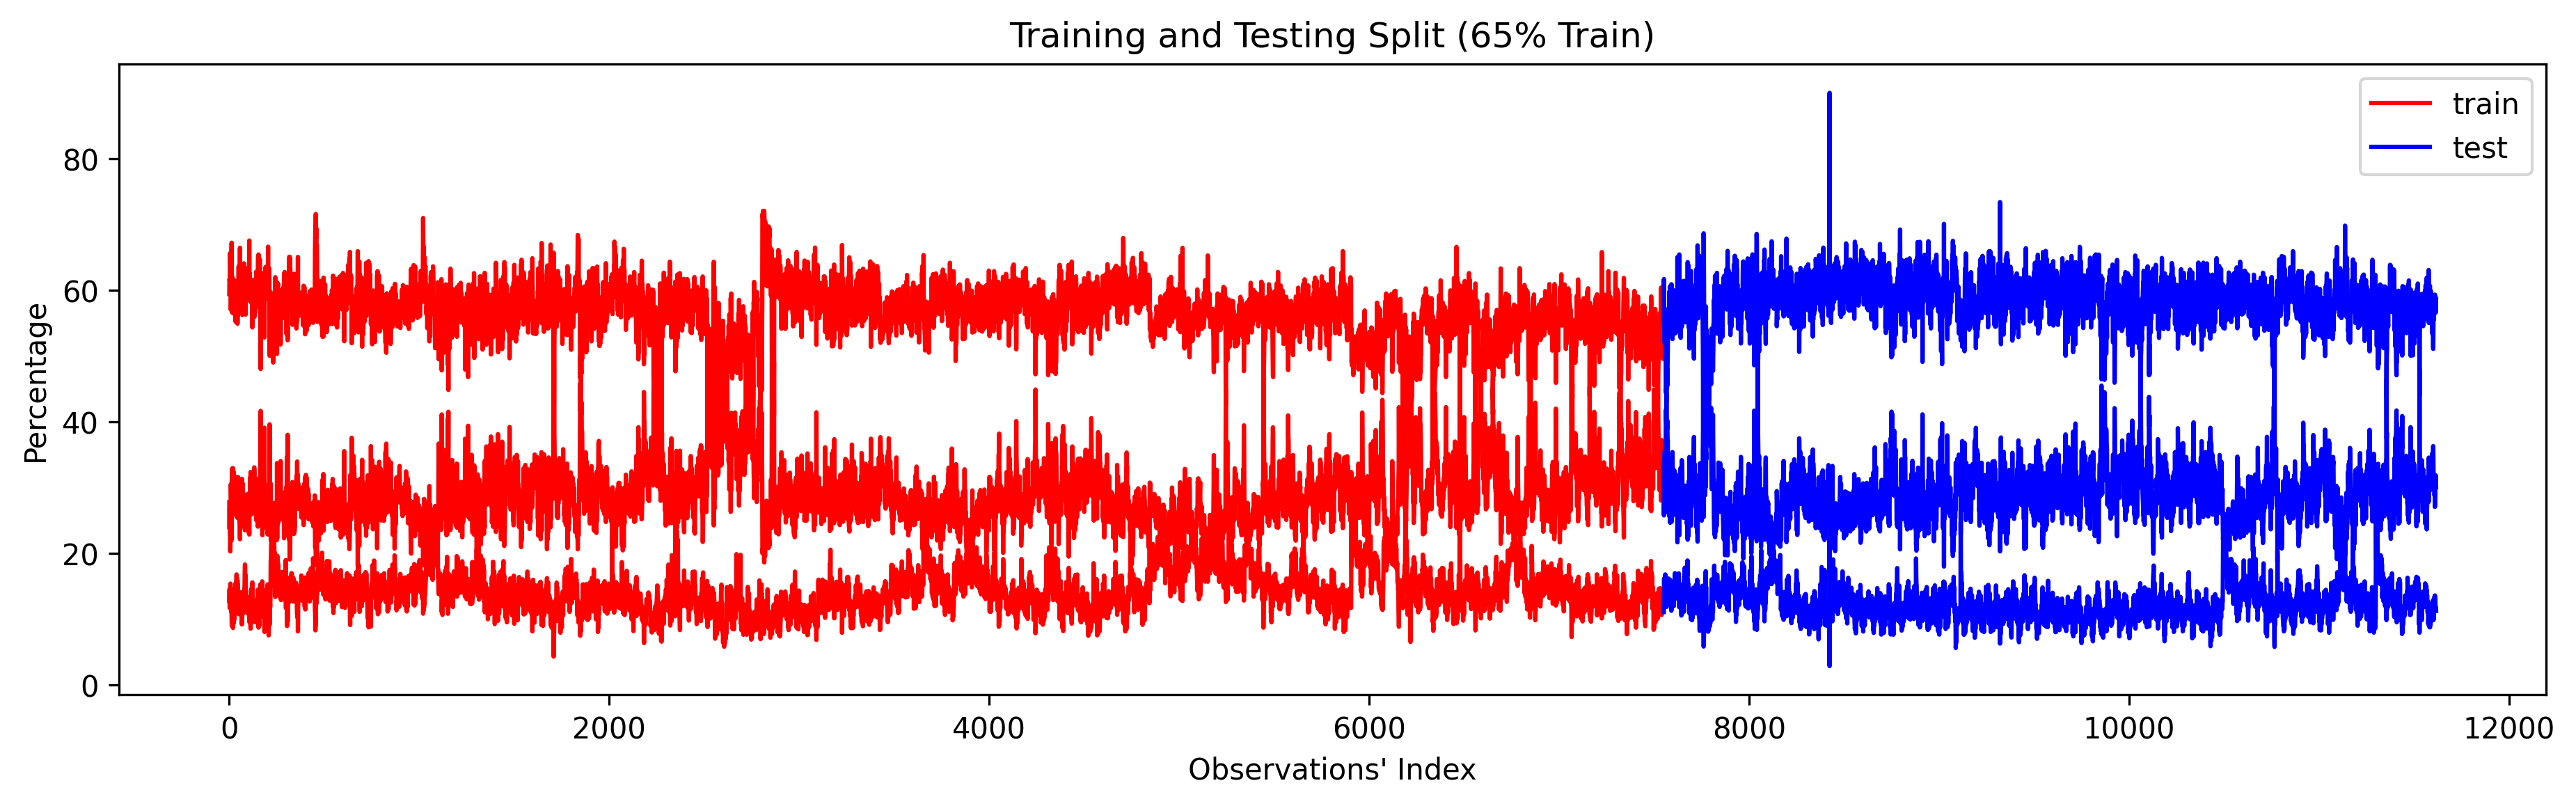

In [312]:
plot = daily_span

x = plot.datetime.values
pos_train = thirty_train_df['pos_percent']
neu_train = thirty_train_df['neu_percent']
neg_train = thirty_train_df['neg_percent']
#mycolors = ['tab:red', 'tab:blue', 'tab:green']    
figure(figsize = (15, 4), dpi = 300)
#plt.title('Tweets\' Daily Sentiments (Percentage)', loc='center')
#plt.plot(x,pos, color=mycolors[2], label="positive")
#plt.plot(x,neu, color=mycolors[1], label="neutral")
#plt.plot(x,neg, color=mycolors[0], label="negative")
pos_test = thirty_test_df['pos_percent']
neu_test = thirty_test_df['neu_percent']
neg_test = thirty_test_df['neg_percent']
plt.title('Training and Testing Split (65% Train)', loc='center')
plt.plot(pos_train, "r", label="train")
plt.plot(neu_train, "r")
plt.plot(neg_train, "r")
plt.plot(pos_test, "b", label="test")
plt.plot(neu_test, "b")
plt.plot(neg_test, "b")
plt.xlabel("Observations' Index", color='#000000')
plt.ylabel("Percentage", color='#000000')

plt.legend(loc="upper right")
plt.show()



In [33]:
numeric_features = [
    "pos_before_change",
    "neu_before_change",
    "neg_before_change",
    "pos_change",
    "neu_change",
    "neg_change",
    "neu_after_change",
    "pos_after_change",
    "neg_after_change",
    "pos_percent",
    "neu_percent",
    "neg_percent",
]

categorical_features = []

drop_features = [
    #targets
    "shift2_up",
    "shift3_up",
    "2_up",
    "3_up",
    "4_up",
    "future2_up",
    "future3_up",
    #unused features
    "curr_up",
    "shift1_up",
    "datetime",
    "vol_btc",
   "c_p_change",
   "shift1_p_change",
   "2spanp",
   "3spanp",
   "c_plus_shift1_p_change",
   "pos_before_change",
    "neu_before_change",
    "neg_before_change",
    "pos_change",
    "neu_change",
    "neg_change",
    "neu_after_change",
    "pos_after_change",
    "neg_after_change",
    "pos_percent",
    "neu_percent",
    "neg_percent",
    "total",
    "vol_btc_change",
    "full_p_change",
]

selected_train_df = two_h_train_df
selected_test_df = two_h_test_df
prediction_target = "shift2_up"


In [34]:
selected_test_df["shift2_up"].value_counts(normalize=True)

1    0.512291
0    0.487709
Name: shift2_up, dtype: float64

In [35]:
def preprocess_features(
    train_df,
    test_df,
    numeric_features,
    categorical_features,
    drop_features,
    target
):

    all_features = set(numeric_features + categorical_features + drop_features)
    if set(train_df.columns) != all_features:
        print("Missing columns", set(train_df.columns) - all_features)
        print("Extra columns", all_features - set(train_df.columns))
        raise Exception("Columns do not match")

    numeric_transformer = make_pipeline(
        SimpleImputer(strategy="median"), StandardScaler()
    )
    '''categorical_transformer = make_pipeline(
        #SimpleImputer(strategy="constant", fill_value="?"),
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore", sparse=False),
    )'''

    preprocessor = make_column_transformer(
        (numeric_transformer, numeric_features),
        #(categorical_transformer, categorical_features),
        ("drop", drop_features),
    )
    preprocessor.fit(train_df)
    '''ohe_feature_names = (
        preprocessor.named_transformers_["pipeline-2"]
        .named_steps["onehotencoder"]
        .get_feature_names()
        .tolist()
    )'''
    #new_columns = numeric_features + ohe_feature_names
    new_columns = numeric_features
    X_train_enc = pd.DataFrame(
        preprocessor.transform(train_df), index=train_df.index, columns=new_columns
    )
    X_test_enc = pd.DataFrame(
        preprocessor.transform(test_df), index=test_df.index, columns=new_columns
    )

    y_train = train_df[target]
    y_test = test_df[target]

    return X_train_enc, y_train, X_test_enc, y_test, preprocessor

In [36]:
X_train_enc, y_train, X_test_enc, y_test, preprocessor = preprocess_features(
    selected_train_df,
    selected_test_df,
    numeric_features,
    categorical_features,
    drop_features,
    prediction_target
)

In [37]:
X_train_enc.head()

,pos_before_change,neu_before_change,neg_before_change,pos_change,neu_change,neg_change,neu_after_change,pos_after_change,neg_after_change,pos_percent,neu_percent,neg_percent
0,-0.009540,0.030095,-0.001742,-0.018240,0.000647,-0.014200,1.262072,-1.418553,0.664510,-0.623474,1.218853,-0.455580
1,-1.419457,1.263706,0.664283,0.258381,-0.034111,-0.423135,-1.308456,1.769863,-1.220798,-1.542723,2.096202,-0.107413
2,1.769808,-1.308492,-1.221160,1.924924,-1.269099,-1.657170,-0.363035,0.839179,-0.957601,-0.394668,1.185482,-0.747391
3,0.838876,-0.362457,-0.957945,0.776838,-0.220471,-1.098509,0.071422,0.214504,-0.486450,0.149950,0.932401,-1.249421
4,0.214035,0.072283,-0.486760,0.357640,-0.363850,-0.119208,-0.551707,0.271275,0.329667,0.289542,0.981530,-1.504506


In [38]:
def score_lr_print_coeff(preprocessor, train_df, y_train, test_df, y_test, X_train_enc):
    lr_pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
    lr_pipe.fit(train_df, y_train)
    print("Train score: {:.5f}".format(lr_pipe.score(train_df, y_train)))
    print("Test score: {:.5f}".format(lr_pipe.score(test_df, y_test)))
    lr_coef = pd.DataFrame(
        data=lr_pipe.named_steps["logisticregression"].coef_.flatten(),
        index=X_train_enc.columns,
        columns=["Coef"],
    )
    return lr_coef.sort_values(by="Coef", ascending=False)

In [39]:
# 30mins, 0930-0720, train 0.55, test 0.53, 1 shift
coef_df = score_lr_print_coeff(preprocessor, selected_train_df, y_train, selected_test_df, y_test, X_train_enc)

Train score: 0.51881
Test score: 0.49754


In [40]:
df_styled = coef_df.style.background_gradient(cmap='RdBu') #adding a divergent gradient based on values in cell
df_styled
dfi.export(df_styled,"two_h_senti_factors.png")

[0312/151601.157740:INFO:headless_shell.cc(659)] Written to file /var/folders/qj/zhs6m1zd0dvg_v7rtzjt38n80000gn/T/tmpk00656g7/temp.png.


Precision is the fraction of cases that are fraudulent out of those that our classifier labelled as positive. The problem with a low precision is that our investigators will spend a lot of time investigating claims that are actually legitimate.

Recall is the fraction of fraudulent cases our classifier finds. The problem with a low recall is that we would be paying out on a lot of undetected fraudulent claims.

If we want a higher precision, so that if our classifier predicted going up, it is more likely to go up, but we detected less proportion of the cases that are going up. (less trading opportunity, higher accuracy)

If we want a higher recall, then among our prediction that the bitcoin is going up, its less likely to go up, but we detected more proportion of the cases that are going up. (more trading opportunity, less accuracy)

Therefore, we care more about precision? 

# 1h

Observations:
The recall of sementic models generally have higher recall compared to 
baseline priced models

<strong>Baseline</strong>
shift1_p_change	-0.039855
c_p_change	-0.144066

Train score: 0.53594
Test score: 0.52188 (0.521878	0.542045	0.491753	0.515676)

c_plus_shift1_p_change	-0.128164
Train score: 0.53019
Test score: 0.52668 (0.526681	0.548200	0.486598	0.515565)


Exp1
neu_change	0.166109
neg_pre_change	0.142978
neg_post_change	0.127850
neu_percent	0.030957
pos_pre_change	0.020187
neg_percent	0.020143
pos_post_change	0.018853
total	0.005838
pos_percent	-0.037233
pos_change	-0.064472
vol_btc_change	-0.083970
neu_post_change	-0.102580
neu_pre_change	-0.124964
neg_change	-0.152797

Train score: 0.51265
Test score: 0.53095 (0.530950	0.544828	0.570103	0.557179)

Exp2: exp1 + price factor "c_plus_shift1_p_change"
Train score: 0.52703
Test score: 0.52455 (0.5	0.524546	0.539778	0.552577	0.546103)

# 30mins
Observations: 
1. for 30 mins prices factors have a stronger influence on future price direction compared to 1h
2. Does it mean including prices as a factor for 30 mins' prediction will have a stronger impact? YES!
3. Including prices + sentiments factors increases all evaluation factors especially recall, compared to baseline
4. Including prices decrease the chance of overfitting the model

Baseline:
c_plus_shift1_p_change	-0.069482 (0.521751	0.528804	0.735113	0.615120)

c_p_change	-0.001419
shift1_p_change	-0.100080
Train score: 0.52206
Test score: 0.52389 (0.523886	0.532905	0.681725	0.598198)

Exp1
pos_change	0.168012
neg_pre_change	0.129002
neg_post_change	0.113397
neu_post_change	0.089122
vol_btc_change	0.079499
neu_pre_change	0.077909
neu_percent	0.030173
c_p_change	0.000646
total	-0.011629
pos_percent	-0.012835
neg_percent	-0.016781
shift1_p_change	-0.099523
neu_change	-0.099739
neg_change	-0.134134
pos_pre_change	-0.142063
pos_post_change	-0.155439
Train score: 0.52595
Test score: 0.52148 (0.521484	0.525637	0.815708	0.639308)

exp2
pos_change	0.173532
neg_pre_change	0.127890
neg_post_change	0.118353
neu_post_change	0.091813
neu_pre_change	0.080184
vol_btc_change	0.076809
neu_percent	0.030805
total	-0.010345
pos_percent	-0.012031
neg_percent	-0.018764
c_plus_shift1_p_change	-0.068613
neu_change	-0.102020
neg_change	-0.140124
pos_pre_change	-0.143314
pos_post_change	-0.161050

Train score: 0.51790
Test score: 0.52469 (0.5	0.524686	0.526021	0.866530	0.654644)

Exp3 (exp1/2 - price factors)
Train score: 0.51603
Test score: 0.51668 (0.516680	0.519724	0.926591	0.665929)


# 2hs

c_plus_shift1_p_change	-0.181843

Train score: 0.54917
Test score: 0.53042 (0.530416	0.537879	0.591667	0.563492)


neg_post_change	0.079504
neu_pre_change	0.069734
neg_percent	0.057452
pos_percent	0.008676
neg_change	0.005855
neu_change	0.004623
pos_change	0.004318
neg_pre_change	-0.005493
pos_post_change	-0.021715
neu_post_change	-0.024930
total	-0.036585
vol_btc_change	-0.039507
pos_pre_change	-0.059234
neu_percent	-0.061897

Train score: 0.52214
Test score: 0.50800 (0.5	0.508004	0.529052	0.360417	0.428748) (0.4 0.512273	0.512326	0.995833	0.676575)

       


In [41]:
thresholds = np.arange(0.50, 0.59, 0.01)
lr_pipe1 = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
lr_pipe1.fit(selected_train_df, y_train)

pr_dict = {"Threshold": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-score": []}
for threshold in thresholds:
    preds = lr_pipe1.predict_proba(selected_test_df)[:, 1] > threshold
    pr_dict["Threshold"].append(threshold)
    pr_dict["Accuracy"].append(accuracy_score(y_test, preds))
    pr_dict["Precision"].append(precision_score(y_test, preds))
    pr_dict["Recall"].append(recall_score(y_test, preds))
    pr_dict["F1-score"].append(f1_score(y_test, preds))

pr_dict_df = pd.DataFrame(pr_dict)

In [42]:
df_styled = pr_dict_df.style.background_gradient() #adding a gradient based on values in cell
df_styled
dfi.export(df_styled,"two_h_senti_pred.png")

[0312/151602.498957:INFO:headless_shell.cc(659)] Written to file /var/folders/qj/zhs6m1zd0dvg_v7rtzjt38n80000gn/T/tmprowvuws9/temp.png.


'\tthreshold\taccuracy\tprecision\trecall\tf1 score\n0\t0.47\t0.515002\t0.517467\t0.902857\t0.657876\n1\t0.48\t0.516478\t0.519741\t0.840000\t0.642155\n2\t0.49\t0.520413\t0.524950\t0.751429\t0.618096\n3\t0.50\t0.511559\t0.523265\t0.610476\t0.563516\n4\t0.51\t0.503689\t0.522404\t0.455238\t0.486514\n5\t0.52\t0.506149\t0.538079\t0.309524\t0.392987\n6\t0.53\t0.502705\t0.552846\t0.194286\t0.287526\n7\t0.54\t0.502705\t0.581590\t0.132381\t0.215671\n8\t0.55\t0.499754\t0.607843\t0.088571\t0.154613\n9\t0.56\t0.493360\t0.602041\t0.056190\t0.102787\n10\t0.57\t0.490408\t0.616667\t0.035238\t0.066667\n11\t0.58\t0.487949\t0.621622\t0.021905\t0.042318\n12\t0.59\t0.486473\t0.607143\t0.016190\t0.031540'

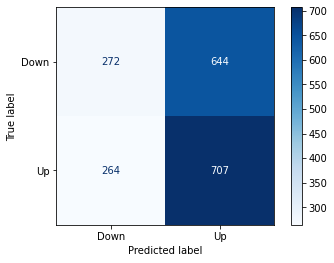

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(
    lr_pipe1,
    selected_train_df,
    y_train,
    display_labels=["Down", "Up"],
    values_format="d",
    cmap=plt.cm.Blues,
)
#0.65 training
#2shift up
#2h sentiment only
#Threshold	Accuracy	Precision	Recall	F1-score
#0	0.500000	0.497542	0.508711	0.560461	0.533333
# dummy: test accuracy: 0.512291

#1h sentiment only
#Threshold	Accuracy	Precision	Recall	F1-score
#0	0.500000	0.524840	0.532768	0.657469	0.588586
# dummy: test accuracy: 0.51697

#30mins sentiment only
#0	0.500000	0.515986	0.519892	0.908274	0.661274
# dummy: test accuracy: 0.520167



#0.65 training
#2shift up
#thirty price only (cp)
'''0	0.47	0.517216	0.518934	0.984870	0.679719
1	0.48	0.517708	0.519504	0.969740	0.676563
2	0.49	0.522381	0.522853	0.935697	0.670847
3	0.50	0.526562	0.530904	0.771631	0.629023
4	0.51	0.514757	0.547651	0.385816	0.452705
5	0.52	0.489670	0.543860	0.117258	0.192921
6	0.53	0.482784	0.538961	0.039243	0.073160
7	0.54	0.481554	0.557377	0.016076	0.031250
8	0.55	0.480325	0.538462	0.006619	0.013078
9	0.56	0.480079	0.538462	0.003310	0.006579
10	0.57	0.479833	0.500000	0.001891	0.003768
11	0.58	0.479833	0.500000	0.001891	0.003768
12	0.59	0.479833	0.500000	0.001418	0.002829'''

#sentiment (cp)
'''0	0.47	0.520167	0.520388	0.989598	0.682092
1	0.48	0.521397	0.521365	0.974941	0.679407
2	0.49	0.522135	0.522643	0.938534	0.671402
3	0.50	0.523364	0.526843	0.821277	0.641907
4	0.51	0.521151	0.537135	0.574468	0.555175
5	0.52	0.504673	0.547064	0.277541	0.368256
6	0.53	0.489916	0.549398	0.107801	0.180237
7	0.54	0.483522	0.552448	0.037352	0.069973
8	0.55	0.478357	0.448276	0.012293	0.023930
9	0.56	0.479095	0.444444	0.005674	0.011204
10	0.57	0.480079	0.538462	0.003310	0.006579
11	0.58	0.480079	0.555556	0.002364	0.004708
12	0.59	0.479833	0.500000	0.001418	0.002829'''



#price oonly (full_p)
'''0	0.47	0.519921	0.520289	0.988180	0.681670
1	0.48	0.517954	0.519605	0.971158	0.676994
2	0.49	0.520905	0.522178	0.929551	0.668707
3	0.50	0.531972	0.534595	0.774468	0.632555
4	0.51	0.516232	0.548493	0.395745	0.459764
5	0.52	0.494097	0.561441	0.125296	0.204871
6	0.53	0.482292	0.532051	0.039243	0.073096
7	0.54	0.479833	0.500000	0.013239	0.025795
8	0.55	0.480079	0.523810	0.005201	0.010300
9	0.56	0.479341	0.416667	0.002364	0.004701
10	0.57	0.479587	0.454545	0.002364	0.004704
11	0.58	0.480325	0.666667	0.001891	0.003772
12	0.59	0.480325	0.666667	0.001891	0.003772'''

#sentiment(full_p)
'''threshold	accuracy	precision	recall	f1 score
0	0.47	0.522873	0.521750	0.992435	0.683936
1	0.48	0.522135	0.521772	0.974468	0.679637
2	0.49	0.523856	0.523621	0.938061	0.672087
3	0.50	0.523856	0.526950	0.827423	0.643856
4	0.51	0.520659	0.536056	0.583452	0.558750
5	0.52	0.508362	0.548822	0.308274	0.394793
6	0.53	0.495573	0.570796	0.121986	0.201013
7	0.54	0.484998	0.563636	0.043972	0.081579
8	0.55	0.478357	0.450000	0.012766	0.024828
9	0.56	0.480325	0.538462	0.006619	0.013078
10	0.57	0.480079	0.538462	0.003310	0.006579
11	0.58	0.479833	0.500000	0.001891	0.003768
12	0.59	0.479833	0.500000	0.001418	0.002829'''

#one h
#price only (cp)
'''0	0.47	0.510576	0.514359	0.954329	0.668444
1	0.48	0.513527	0.516472	0.924833	0.662803
2	0.49	0.518446	0.521102	0.845861	0.644904
3	0.50	0.529759	0.535527	0.681256	0.599665
4	0.51	0.526808	0.558630	0.403425	0.468508
5	0.52	0.524348	0.625749	0.198858	0.301805
6	0.53	0.497295	0.591195	0.089439	0.155372
7	0.54	0.487949	0.562500	0.042816	0.079576
8	0.55	0.484014	0.526316	0.019029	0.036731
9	0.56	0.484998	0.611111	0.010466	0.020580
10	0.57	0.484506	0.636364	0.006660	0.013183
11	0.58	0.483030	0.500000	0.003806	0.007554
12	0.59	0.482046	0.333333	0.001903	0.003784'''

#sentiment (cp)
'''0	0.47	0.514019	0.516872	0.918173	0.661412
1	0.48	0.514511	0.518286	0.862988	0.647626
2	0.49	0.523364	0.526728	0.768792	0.625145
3	0.50	0.532710	0.540368	0.643197	0.587315
4	0.51	0.522381	0.543573	0.474786	0.506856
5	0.52	0.517954	0.556260	0.333968	0.417360
6	0.53	0.515494	0.587302	0.211227	0.310707
7	0.54	0.502705	0.588496	0.126546	0.208301
8	0.55	0.498278	0.620155	0.076118	0.135593
9	0.56	0.493360	0.643836	0.044719	0.083630
10	0.57	0.488441	0.617021	0.027593	0.052823
11	0.58	0.486965	0.681818	0.014272	0.027959
12	0.59	0.483522	0.538462	0.006660	0.013158'''

# price only (full_p)
'''
0	0.47	0.515494	0.517497	0.928639	0.664624
1	0.48	0.520413	0.521396	0.881066	0.655111
2	0.49	0.531235	0.531170	0.794481	0.636676
3	0.50	0.529267	0.537781	0.636537	0.583007
4	0.51	0.534678	0.562874	0.447193	0.498409
5	0.52	0.520905	0.582090	0.259753	0.359211
6	0.53	0.505657	0.595041	0.137012	0.222738
7	0.54	0.493360	0.572414	0.078972	0.138796
8	0.55	0.485489	0.528736	0.043768	0.080844
9	0.56	0.486473	0.571429	0.026641	0.050909
10	0.57	0.485489	0.592593	0.015224	0.029685
11	0.58	0.481554	0.400000	0.005709	0.011257
12	0.59	0.481554	0.363636	0.003806	0.007533'''

# sentiment (full_p)
'''	threshold	accuracy	precision	recall	f1 score
0	0.47	0.512051	0.516024	0.903901	0.656985
1	0.48	0.520905	0.522634	0.845861	0.646076
2	0.49	0.520413	0.524934	0.761180	0.621359
3	0.50	0.531727	0.538581	0.657469	0.592117
4	0.51	0.538121	0.556680	0.523311	0.539480
5	0.52	0.526808	0.562064	0.383444	0.455882
6	0.53	0.512543	0.566372	0.243578	0.340652
7	0.54	0.501230	0.567273	0.148430	0.235294
8	0.55	0.498278	0.585635	0.100856	0.172078
9	0.56	0.497787	0.627119	0.070409	0.126604
10	0.57	0.487457	0.563380	0.038059	0.071301
11	0.58	0.488933	0.625000	0.028544	0.054595
12	0.59	0.486965	0.625000	0.019029	0.036934'''

#twoh
#price only (cp)
'''0	0.47	0.514258	0.513932	0.955854	0.668456
1	0.48	0.526057	0.520856	0.934741	0.668956
2	0.49	0.529007	0.524194	0.873321	0.655148
3	0.50	0.539823	0.534460	0.788868	0.637209
4	0.51	0.532940	0.538333	0.619962	0.576271
5	0.52	0.553589	0.586563	0.435701	0.500000
6	0.53	0.529007	0.594595	0.253359	0.355316
7	0.54	0.517207	0.631579	0.138196	0.226772
8	0.55	0.502458	0.608696	0.080614	0.142373
9	0.56	0.501475	0.675000	0.051823	0.096257
10	0.57	0.494592	0.652174	0.028791	0.055147
11	0.58	0.489676	0.562500	0.017274	0.033520
12	0.59	0.488692	0.571429	0.007678	0.015152'''

#sentiment (cp)
'''0	0.47	0.521141	0.519406	0.873321	0.651396
1	0.48	0.519174	0.519704	0.809981	0.633158
2	0.49	0.529990	0.529332	0.744722	0.618820
3	0.50	0.521141	0.527244	0.631478	0.574672
4	0.51	0.517207	0.530864	0.495202	0.512413
5	0.52	0.523107	0.550279	0.378119	0.448237
6	0.53	0.517207	0.560484	0.266795	0.361508
7	0.54	0.515241	0.592105	0.172745	0.267459
8	0.55	0.502458	0.580645	0.103647	0.175896
9	0.56	0.503441	0.633333	0.072937	0.130809
10	0.57	0.503441	0.700000	0.053743	0.099822
11	0.58	0.496559	0.800000	0.023033	0.044776
12	0.59	0.492625	0.727273	0.015355	0.030075
'''

#3_up
#1h
#price only (cp)
'''0	0.47	0.514019	0.516472	0.925714	0.663029
1	0.48	0.519429	0.520656	0.876190	0.653177
2	0.49	0.508116	0.516108	0.762857	0.615680
3	0.50	0.515986	0.526442	0.625714	0.571802
4	0.51	0.526808	0.553790	0.431429	0.485011
5	0.52	0.511559	0.558522	0.259048	0.353936
6	0.53	0.503689	0.576208	0.147619	0.235027
7	0.54	0.497295	0.589744	0.087619	0.152570
8	0.55	0.495327	0.630435	0.055238	0.101576
9	0.56	0.490900	0.631579	0.034286	0.065041
10	0.57	0.487949	0.628571	0.020952	0.040553
11	0.58	0.483522	0.500000	0.009524	0.018692
12	0.59	0.483030	0.454545	0.004762	0.009425'''

#sentiment (cp)
'''	threshold	accuracy	precision	recall	f1 score
0	0.47	0.515002	0.517467	0.902857	0.657876
1	0.48	0.516478	0.519741	0.840000	0.642155
2	0.49	0.520413	0.524950	0.751429	0.618096
3	0.50	0.511559	0.523265	0.610476	0.563516
4	0.51	0.503689	0.522404	0.455238	0.486514
5	0.52	0.506149	0.538079	0.309524	0.392987
6	0.53	0.502705	0.552846	0.194286	0.287526
7	0.54	0.502705	0.581590	0.132381	0.215671
8	0.55	0.499754	0.607843	0.088571	0.154613
9	0.56	0.493360	0.602041	0.056190	0.102787
10	0.57	0.490408	0.616667	0.035238	0.066667
11	0.58	0.487949	0.621622	0.021905	0.042318
12	0.59	0.486473	0.607143	0.016190	0.031540'''


In [44]:
#30mins sentiment only
#0	0.500000	0.515986	0.519892	0.908274	0.661274
# dummy: test accuracy: 0.520167

#2h sentiment only
#Threshold	Accuracy	Precision	Recall	F1-score
#0	0.500000	0.497542	0.508711	0.560461	0.533333
# dummy: test accuracy: 0.512291

#1h sentiment only
#Threshold	Accuracy	Precision	Recall	F1-score
#0	0.500000	0.524840	0.532768	0.657469	0.588586
# dummy: test accuracy: 0.51697

thirty_data = {#'Name':[,'Accuracy','Precision','Recall','F1-score'],
        'Accuracy':[0.523856, 0.531972, 0.515986, 0.520167],
        'Precision':[0.526950, 0.534595, 0.519892, np.nan],
        'Recall': [0.827423, 0.774468, 0.908274, np.nan],
        'F1-score': [0.643856, 0.632555, 0.661274, np.nan]}
 
# Creates pandas DataFrame.
df_thirty_default_result = pd.DataFrame(thirty_data, index =['30 mins-full',
                                '30 mins-price-only',
                                '30 mins-sentiment-only',
                                '30 mins-baseline'
                                ])
 
# print the data
thirty_styled = df_thirty_default_result.style.background_gradient() #adding a gradient based on values in cell
thirty_styled

dfi.export(thirty_styled,"thirty_default_full.png")

[0312/151603.898142:INFO:headless_shell.cc(659)] Written to file /var/folders/qj/zhs6m1zd0dvg_v7rtzjt38n80000gn/T/tmp3od1lp8u/temp.png.


In [45]:
full_data = {#'Name':[,'Accuracy','Precision','Recall','F1-score'],
        'Accuracy':[0.523856, 0.531972, 0.515986, 0.520167, 
                    0.531727, 0.529267, 0.524840, 0.516970,
                    0.513274, 0.538840, 0.497542, 0.512291],
        'Precision':[0.526950, 0.534595, 0.519892, np.nan,
                     0.538581, 0.537781, 0.532768, np.nan,
                     0.520833, 0.532500, 0.508711, np.nan],
        'Recall': [0.827423, 0.774468, 0.908274, np.nan,
                   0.657469, 0.636537, 0.657469, np.nan,
                   0.623800, 0.817658, 0.560461, np.nan],
        'F1-score': [0.643856, 0.632555, 0.661274, np.nan,
                     0.592117, 0.583007, 0.588586, np.nan,
                     0.567686, 0.644966, 0.533333, np.nan]}
 
# Creates pandas DataFrame.
df_full_default_result = pd.DataFrame(full_data, index =['30 mins-full',
                                '30 mins-price',
                                '30 mins-sentiment',
                                '30 mins-baseline',
                                '1h-full',
                                '1h-price',
                                '1h-sentiment',
                                '1h-baseline',
                                '2h-full',
                                '2h-price',
                                '2h-sentiment',
                                '2h-baseline',
                                ])
 
# print the data
#thirty_styled = df_two_h_default_result.style.background_gradient() #adding a gradient based on values in cell
#thirty_styled

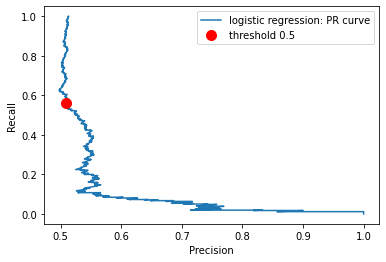

In [46]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, lr_pipe1.predict_proba(selected_test_df)[:, 1]
)
plt.plot(precision, recall, label="logistic regression: PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(
    precision_score(y_test, lr_pipe1.predict(selected_test_df)),
    recall_score(y_test, lr_pipe1.predict(selected_test_df)),
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");

plt.savefig('two_h_senti_PR.png', bbox_inches='tight')

In [47]:
thresholds_p = np.arange(0.5, 0.67, 0.01)
#print(selected_test_df[['2spanp', '3spanp']])

lr_pipe2 = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
lr_pipe2.fit(selected_train_df, y_train)
pr_dict = {"threshold": [], "raw_profit": [], "times_traded": [], "rprofit_per_trade": [],}
for threshold in thresholds_p:
    preds = lr_pipe2.predict_proba(selected_test_df)[:, 1] > threshold
    samples_count = selected_test_df[preds].shape
    c_raw_profit = sum(selected_test_df[preds]['3spanp'] - selected_test_df[preds]['2spanp'])
    pr_dict["threshold"].append(threshold)
    pr_dict["raw_profit"].append(c_raw_profit)
    pr_dict["times_traded"].append(samples_count[0])
    pr_dict["rprofit_per_trade"].append(c_raw_profit / samples_count[0])
pd.DataFrame(pr_dict)


,threshold,raw_profit,times_traded,rprofit_per_trade
0,0.50,10058.83,574,17.524094
1,0.51,10182.67,421,24.186865
2,0.52,5472.95,279,19.616308
3,0.53,3392.34,164,20.685000
4,0.54,2487.15,77,32.300649
5,0.55,3752.41,38,98.747632
6,0.56,2753.12,21,131.100952
7,0.57,2102.01,13,161.693077
8,0.58,2233.36,11,203.032727
9,0.59,2030.19,4,507.547500
